### Business Understanding


Background: Recently, there has been a significant surge in online gambling transactions in Indonesia through E-Money services and digital wallets. Payment service providers are required to report and block these transactions to comply with regulations and avoid the risk of fines and reputational damage. You will be given access to a financial transaction dataset with masked personal information (PII) to analyze indications of these suspicious financial transactions.

Objective: Analyze the transaction dataset to identify patterns of online gambling transactions and distinguish them from other types of transactions.

### Data Understanding

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Career/2024_Fraud Data Analytics/dataset.csv'
df = pd.read_csv(file_path)
df

,orderid,trans_status,trans_initiate_time,trans_end_time,debit_party_id,debit_party_type,debit_party_account,debit_party_mnemonic,credit_party_id,credit_party_type,...,initiator_mnemonic,reason,thirdpartyid,linkedorder_createtime,linkedorder_endtime,error_message,debit_user_sharia,credit_user_sharia,is_sharia,label
0,9DIxxxxU13,completed,2022-04-18 20:44:16,2022-04-18 20:44:16,201xxxxxxxxxxxx700,merchant,500xxxxxxxxxxxx136,628xxxxxxxx12 - CUxxxxxxxELL,201xxxxxxxxxxxx864,merchant,...,CUTxxxxxxxxxxxxxxxxxxxx412,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified
1,BGWxxxxKV3,completed,2022-09-28 15:41:28,2022-09-28 15:41:28,202xxxxxxxxxxxx292,customer,100xxxxxxxxxxxx440,628xxxxxxx10 - PAxxxxxxxxxxxxxxxxxxx SI,201xxxxxxxxxxxx496,merchant,...,628xxxxxxx10 - PAxxxxxxxxxxxxxxxxxxx SI,BuyGoodsKUE,NaN,NaN,NaN,NaN,False,False,False,unidentified
2,C4Dxxxx921,completed,2023-08-07 21:58:49,2023-08-07 21:58:49,202xxxxxxxxxxxx886,customer,100xxxxxxxxxxxx960,628xxxxxxx560-IPAxxxxxxPAH,202xxxxxxxxxxxx944,customer,...,628xxxxxxx560-IPAxxxxxxPAH,SendMoney,NaN,NaN,NaN,NaN,False,True,True,reported
3,7EGxxxxML2,completed,2020-05-16 9:25:38,2020-05-16 9:25:38,201xxxxxxxxxxxx278,merchant,500xxxxxxxxxxxx984,628xxxxxxxx57 - AUxxxxxELL-230xxxx663,201xxxxxxxxxxxx288,merchant,...,AUFxxxxELL-230xxxxxxxxxxxxxxxxxx157,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified
4,C4Dxxxx104,completed,2023-08-09 15:06:09,2023-08-09 15:06:09,202xxxxxxxxxxxx376,customer,200xxxxxxxxxxx000,628xxxxxxx684-AHMxxxxxxxxRDI,202xxxxxxxxxxxx000,customer,...,628xxxxxxx684-AHMxxxxxxxxRDI,SendMoney,NaN,NaN,NaN,NaN,False,False,False,unidentified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7KKxxxxL1D,completed,2020-11-20 20:27:19,2020-11-20 20:27:19,201xxxxxxxxxxxx290,merchant,500xxxxxxxxxxxx704,628xxxxxxxx76 - 60xxxxxx59 - 82xxxxxx476,201xxxxxxxxxxxx184,merchant,...,600xxxxx59 - 82xxxxxxxxxxxxxxxxxxxx476,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified
996,C4Axxxx60J,completed,2023-07-13 5:31:18,2023-07-13 5:31:18,202xxxxxxxxxxxx022,customer,100xxxxxxxxxxxx784,628xxxxxxxx68 - LAxxxxxxxADI,202xxxxxxxxxxxx832,customer,...,628xxxxxxxx68 - LAxxxxxxxADI,SendMoney,NaN,NaN,NaN,NaN,True,False,True,unidentified
997,C54xxxxA0H,completed,2023-11-07 11:44:42,2023-11-07 11:44:42,201xxxxxxxxxxxx399,merchant,500xxxxxxxxxxxx328,628xxxxxxxx53 - R xxxxxxxxxxSEL,201xxxxxxxxxxxx176,merchant,...,R Sxxxxxxxxxxxxxxxxxxxxxxx753,NaN,NaN,NaN,NaN,NaN,False,False,False,unidentified
998,C48xxxx70J,completed,2023-06-10 0:48:39,2023-06-10 0:48:39,202xxxxxxxxxxxx987,customer,100xxxxxxxxxxxx400,628xxxxxxxx99 - ARxxxxxxxxxJAT,202xxxxxxxxxxxx432,customer,...,628xxxxxxxx99 - ARxxxxxxxxxJAT,SendMoney,NaN,NaN,NaN,NaN,False,False,False,unidentified


In [ ]:
 print(df.head()) # View the first few rows

      orderid trans_status  trans_initiate_time       trans_end_time  \
0  9DIxxxxU13    completed  2022-04-18 20:44:16  2022-04-18 20:44:16   
1  BGWxxxxKV3    completed  2022-09-28 15:41:28  2022-09-28 15:41:28   
2  C4Dxxxx921    completed  2023-08-07 21:58:49  2023-08-07 21:58:49   
3  7EGxxxxML2    completed   2020-05-16 9:25:38   2020-05-16 9:25:38   
4  C4Dxxxx104    completed  2023-08-09 15:06:09  2023-08-09 15:06:09   

       debit_party_id debit_party_type debit_party_account  \
0  201xxxxxxxxxxxx700         merchant  500xxxxxxxxxxxx136   
1  202xxxxxxxxxxxx292         customer  100xxxxxxxxxxxx440   
2  202xxxxxxxxxxxx886         customer  100xxxxxxxxxxxx960   
3  201xxxxxxxxxxxx278         merchant  500xxxxxxxxxxxx984   
4  202xxxxxxxxxxxx376         customer   200xxxxxxxxxxx000   

                      debit_party_mnemonic     credit_party_id  \
0             628xxxxxxxx12 - CUxxxxxxxELL  201xxxxxxxxxxxx864   
1  628xxxxxxx10 - PAxxxxxxxxxxxxxxxxxxx SI  201xxxxxxxxxxxx496

In [ ]:
print(df.describe()) # Get summary statistics for numerical columns

       trans_amount          fee   commission  discount_amount  \
count  1.000000e+03  1000.000000  1000.000000           1000.0   
mean   9.167013e+04   124.891330    12.534050              0.0   
std    3.000379e+05   442.512785   128.451704              0.0   
min    1.000000e+00     0.000000     0.000000              0.0   
25%    1.000000e+04     0.000000     0.000000              0.0   
50%    2.500000e+04     0.000000     0.000000              0.0   
75%    5.010875e+04    20.000000     0.000000              0.0   
max    5.000000e+06  6526.000000  2930.000000              0.0   

       redeemed_point_amount  derived_orderid   reason_type  
count              24.000000              0.0  9.840000e+02  
mean             2566.666667              NaN  1.000347e+07  
std              5385.642480              NaN  4.372525e+02  
min                 0.000000              NaN  1.000215e+07  
25%                 0.000000              NaN  1.000344e+07  
50%                 0.000000     

In [ ]:
print(df.info()) # Get an overview of the dataset structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   orderid                 1000 non-null   object 
 1   trans_status            1000 non-null   object 
 2   trans_initiate_time     1000 non-null   object 
 3   trans_end_time          1000 non-null   object 
 4   debit_party_id          1000 non-null   object 
 5   debit_party_type        1000 non-null   object 
 6   debit_party_account     1000 non-null   object 
 7   debit_party_mnemonic    1000 non-null   object 
 8   credit_party_id         1000 non-null   object 
 9   credit_party_type       996 non-null    object 
 10  credit_party_account    1000 non-null   object 
 11  credit_party_mnemonic   996 non-null    object 
 12  trans_amount            1000 non-null   int64  
 13  fee                     1000 non-null   float64
 14  commission              1000 non-null   f

In [ ]:
df.columns

Index(['orderid', 'trans_status', 'trans_initiate_time', 'trans_end_time',
       'debit_party_id', 'debit_party_type', 'debit_party_account',
       'debit_party_mnemonic', 'credit_party_id', 'credit_party_type',
       'credit_party_account', 'credit_party_mnemonic', 'trans_amount', 'fee',
       'commission', 'discount_amount', 'redeemed_point_amount',
       'redeemed_point_type', 'currency', 'is_reversed', 'is_reversal',
       'is_partial_reversed', 'linked_type', 'linked_orderid',
       'derived_orderid', 'reason_type', 'reason_name', 'transaction_type',
       'remark', 'channel', 'initiator_id', 'initiator_mnemonic', 'reason',
       'thirdpartyid', 'linkedorder_createtime', 'linkedorder_endtime',
       'error_message', 'debit_user_sharia', 'credit_user_sharia', 'is_sharia',
       'label'],
      dtype='object')

### Exploratory Data Analysis

In [ ]:
# Identifikasi customer_id yang terlibat dalam transaksi judi online
reported_customers = df[df['label'] == 'reported']['debit_party_id'].unique()

In [ ]:
reported_customers_count = filtered_df.shape[0]

print(reported_customers_count)

275


In [ ]:
# Data untuk transaksi judi online
reported_df = df[df['debit_party_id'].isin(reported_customers)]

# Statistik deskriptif untuk transaksi judi online
stats_reported = reported_df.groupby('debit_party_id').agg({
    'trans_amount': ['count', 'mean', 'min', 'max'],
    'trans_initiate_time': ['min', 'max']
}).reset_index()

stats_reported.columns = ['debit_party_id', 'transaction_count', 'avg_amount', 'min_amount', 'max_amount', 'first_transaction', 'last_transaction']
print("Statistics for Reported Transactions:")
print(stats_reported)


Statistics for Reported Transactions:
        debit_party_id  transaction_count    avg_amount  min_amount  \
0   201xxxxxxxxxxxx003                  6  8.000000e+04       25000   
1   201xxxxxxxxxxxx363                  1  2.000000e+04       20000   
2   201xxxxxxxxxxxx873                  3  1.163333e+05       49000   
3   201xxxxxxxxxxxx963                  7  3.378266e+05       10000   
4   202xxxxxxxxxxxx009                  5  9.673000e+05        7500   
..                 ...                ...           ...         ...   
76  202xxxxxxxxxxxx907                  1  8.000000e+04       80000   
77  202xxxxxxxxxxxx909                  2  3.000000e+04       30000   
78  202xxxxxxxxxxxx916                  1  9.000000e+01          90   
79  202xxxxxxxxxxxx970                  2  7.500000e+04       50000   
80  202xxxxxxxxxxxx989                  3  1.083333e+06       50000   

    max_amount    first_transaction     last_transaction  
0       160000  2020-08-15 22:40:52  2023-10-22 20

##### Customer berdasarkan label

In [ ]:
# Pisahkan data berdasarkan label
df_judi_online = df[df['label'] == 'reported']
df_normal = df[df['label'] == 'unidentified']

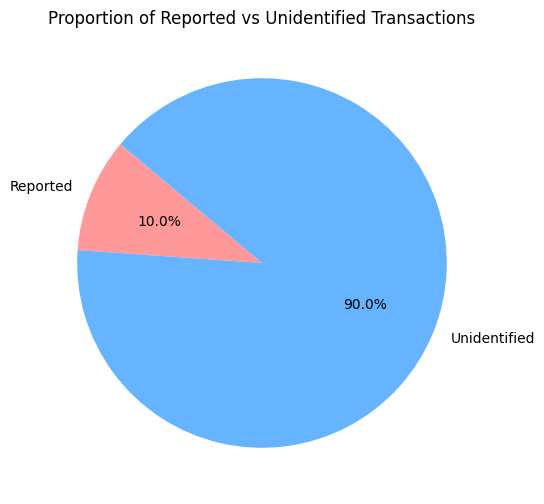

In [ ]:
labels = ['Reported', 'Unidentified']
sizes = [df_judi_online.shape[0], df_normal.shape[0]]

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Proportion of Reported vs Unidentified Transactions')
plt.show()

In [ ]:
# Statistik deskriptif untuk transaksi judi online
stats_judi_online = df_judi_online.describe()

# Statistik deskriptif untuk transaksi normal
stats_normal = df_normal.describe()

print("Statistik Deskriptif Judi Online:")
print(stats_judi_online)

print("\nStatistik Deskriptif Normal:")
print(stats_normal)


Statistik Deskriptif Judi Online:
       trans_amount         fee  commission  discount_amount  \
count  1.000000e+02   100.00000    100.0000            100.0   
mean   1.660339e+05   270.96250     31.8000              0.0   
std    4.138105e+05   895.55309    293.8129              0.0   
min    5.000000e+01     0.00000      0.0000              0.0   
25%    2.500000e+04     0.00000      0.0000              0.0   
50%    5.000000e+04     0.00000      0.0000              0.0   
75%    1.000000e+05     0.00000      0.0000              0.0   
max    2.342153e+06  6526.00000   2930.0000              0.0   

       redeemed_point_amount  derived_orderid   reason_type  
count                    4.0              0.0  9.600000e+01  
mean                     0.0              NaN  1.000376e+07  
std                      0.0              NaN  1.629635e+02  
min                      0.0              NaN  1.000219e+07  
25%                      0.0              NaN  1.000378e+07  
50%              

<ipython-input-97-77e13ce753dd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_judi_online['hour'] = df_judi_online['trans_initiate_time'].dt.hour
<ipython-input-97-77e13ce753dd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_judi_online['day_of_week'] = df_judi_online['trans_initiate_time'].dt.dayofweek


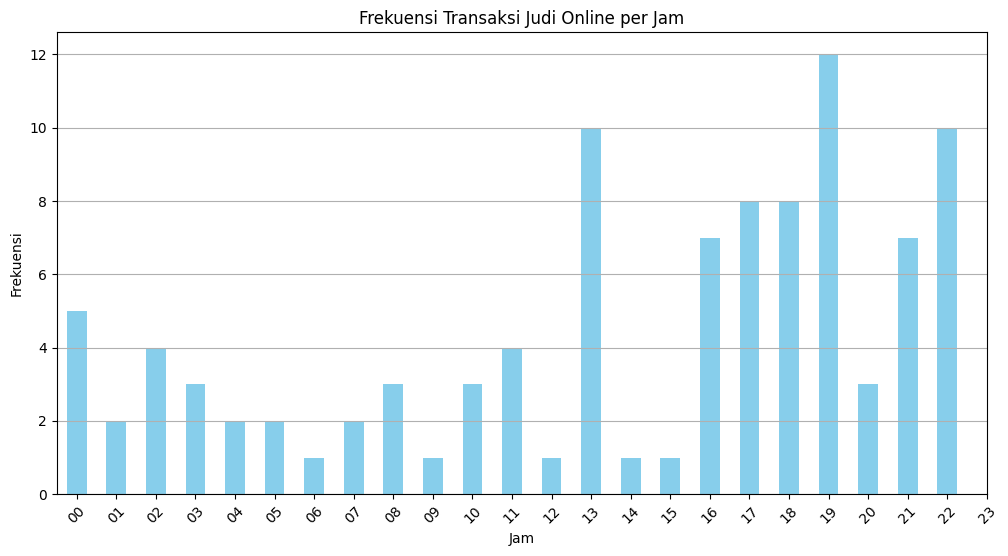

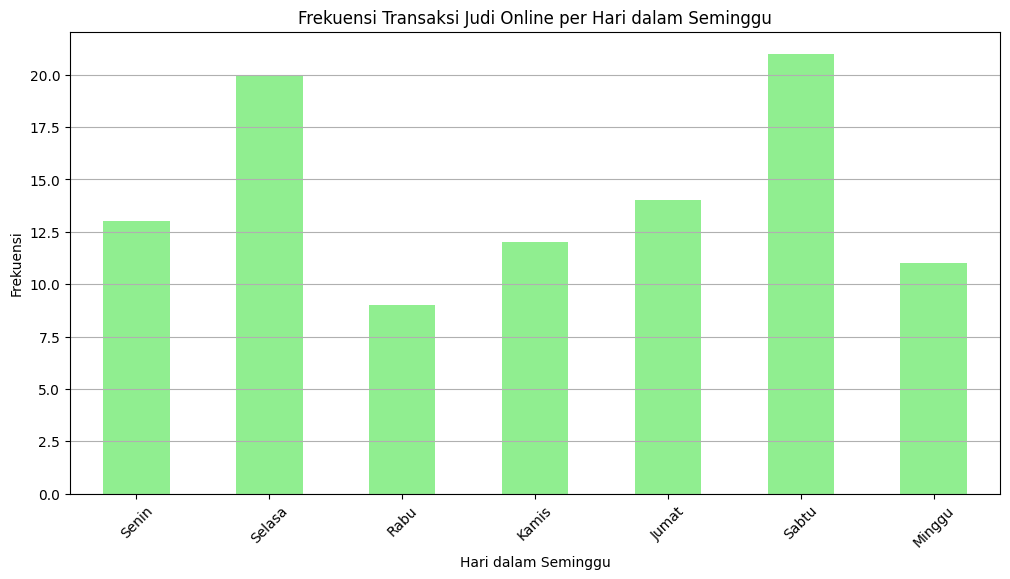

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan kolom 'trans_initiate_time' adalah tipe datetime
df['trans_initiate_time'] = pd.to_datetime(df['trans_initiate_time'], errors='coerce')

# Pisahkan data berdasarkan label
df_judi_online = df[df['label'] == 'reported']

# Ekstrak jam dan hari dalam seminggu
df_judi_online['hour'] = df_judi_online['trans_initiate_time'].dt.hour
df_judi_online['day_of_week'] = df_judi_online['trans_initiate_time'].dt.dayofweek

# Frekuensi transaksi berdasarkan jam
plt.figure(figsize=(12, 6))
df_judi_online['hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frekuensi Transaksi Judi Online per Jam')
plt.xlabel('Jam')
plt.ylabel('Frekuensi')
plt.xticks(range(24), [f'{i:02d}' for i in range(24)], rotation=45)  # Format jam dengan dua digit
plt.grid(axis='y')
plt.show()

# Frekuensi transaksi berdasarkan hari dalam seminggu
plt.figure(figsize=(12, 6))
df_judi_online['day_of_week'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Frekuensi Transaksi Judi Online per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Frekuensi')
plt.xticks(range(7), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'], rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
# Jumlah transaksi per customer_id
transaksi_per_customer_judi_online = df_judi_online['debit_party_id'].value_counts()
transaksi_per_customer_normal = df_normal['debit_party_id'].value_counts()

print("Jumlah Transaksi per Customer (Judi Online):")
print(transaksi_per_customer_judi_online)

print("\nJumlah Transaksi per Customer (Normal):")
print(transaksi_per_customer_normal)


Jumlah Transaksi per Customer (Judi Online):
debit_party_id
202xxxxxxxxxxxx695    5
202xxxxxxxxxxxx791    3
202xxxxxxxxxxxx428    2
202xxxxxxxxxxxx763    2
202xxxxxxxxxxxx422    2
                     ..
202xxxxxxxxxxxx309    1
202xxxxxxxxxxxx307    1
202xxxxxxxxxxxx376    1
202xxxxxxxxxxxx634    1
202xxxxxxxxxxxx246    1
Name: count, Length: 81, dtype: int64

Jumlah Transaksi per Customer (Normal):
debit_party_id
201xxxxxxxxxxxx820    14
201xxxxxxxxxxxx939    10
201xxxxxxxxxxxx846    10
201xxxxxxxxxxxx077     9
201xxxxxxxxxxxx812     7
                      ..
201xxxxxxxxxxxx462     1
202xxxxxxxxxxxx995     1
201xxxxxxxxxxxx193     1
201xxxxxxxxxxxx322     1
202xxxxxxxxxxxx987     1
Name: count, Length: 645, dtype: int64


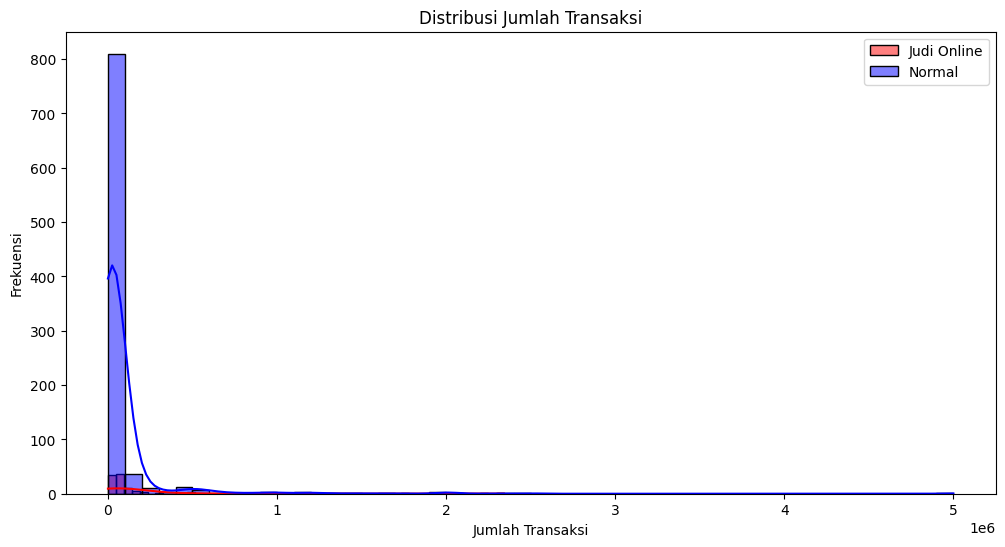

In [ ]:
import seaborn as sns

# Distribusi jumlah transaksi
plt.figure(figsize=(12, 6))
sns.histplot(df_judi_online['trans_amount'], bins=50, kde=True, color='red', label='Judi Online')
sns.histplot(df_normal['trans_amount'], bins=50, kde=True, color='blue', label='Normal')
plt.title('Distribusi Jumlah Transaksi')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()


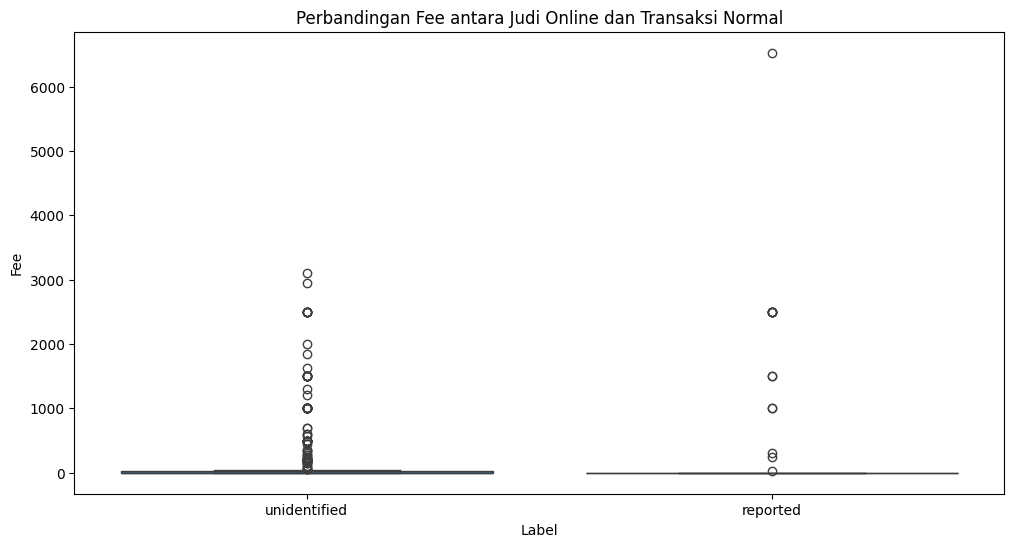

In [ ]:
# Analisis fee
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='fee', data=df)
plt.title('Perbandingan Fee antara Judi Online dan Transaksi Normal')
plt.xlabel('Label')
plt.ylabel('Fee')
plt.show()


<ipython-input-101-878a26ac1ef5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_judi_online, x='transaction_type', palette='Reds')


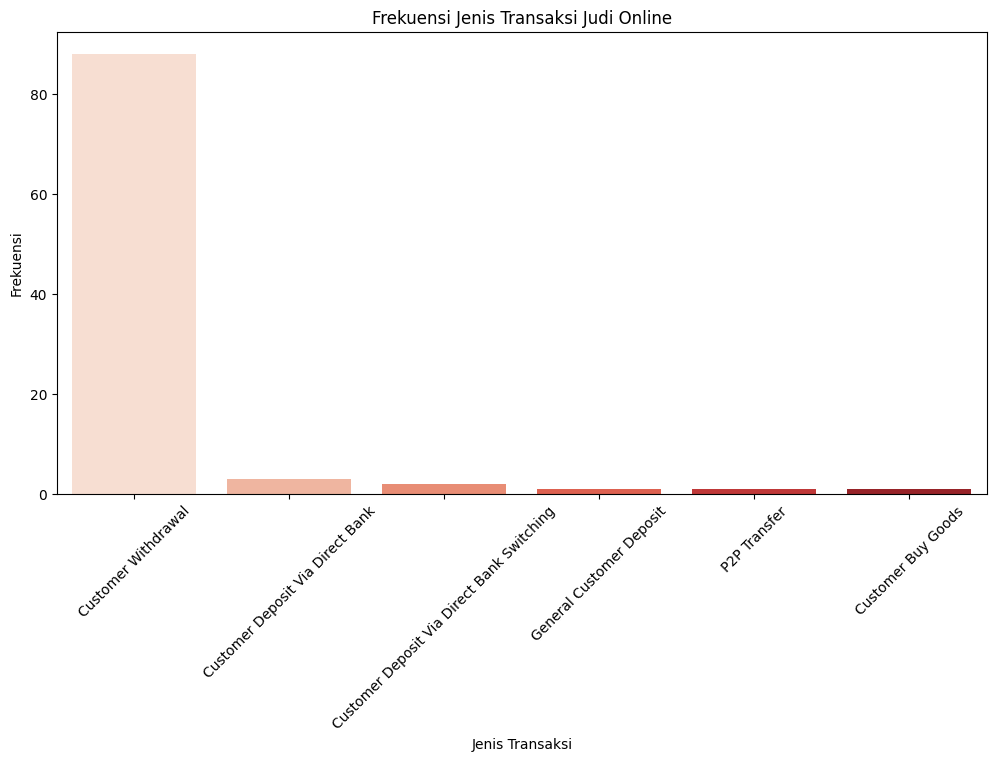

<ipython-input-101-878a26ac1ef5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_normal, x='transaction_type', palette='Blues')


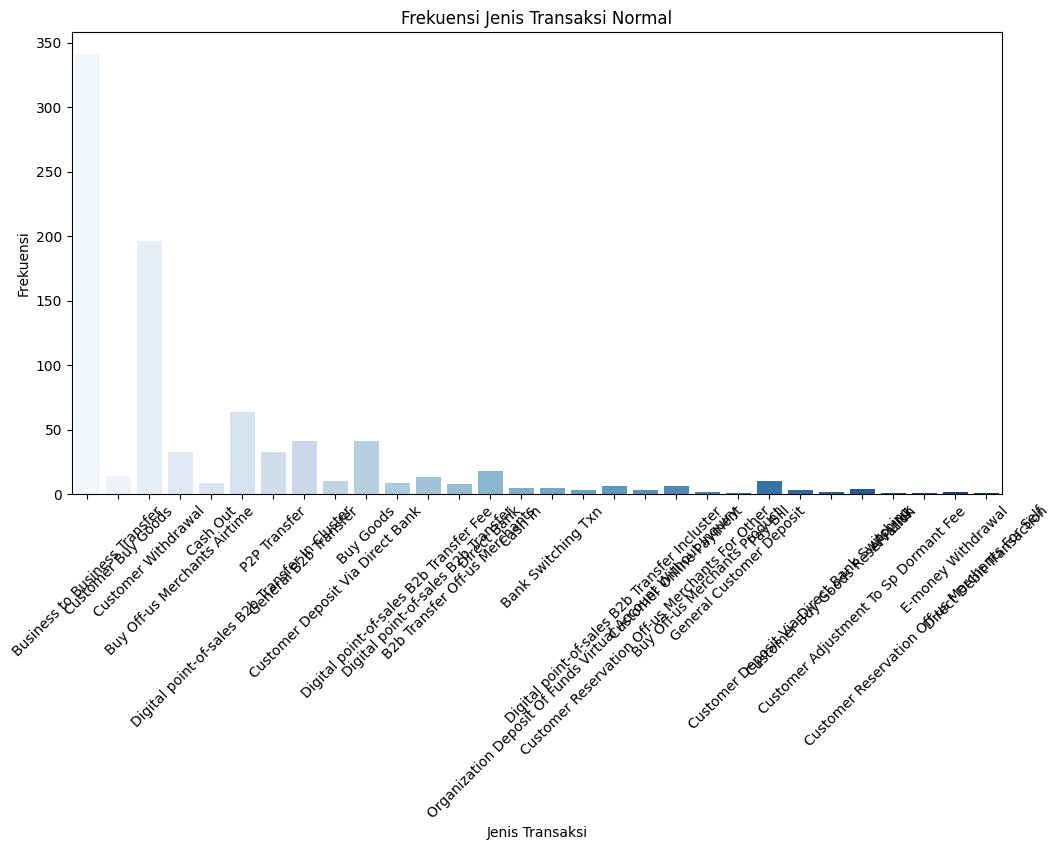

In [ ]:
# Frekuensi transaksi berdasarkan jenis transaksi untuk judi online
plt.figure(figsize=(12, 6))
sns.countplot(data=df_judi_online, x='transaction_type', palette='Reds')
plt.title('Frekuensi Jenis Transaksi Judi Online')
plt.xlabel('Jenis Transaksi')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

# Frekuensi transaksi berdasarkan jenis transaksi untuk transaksi normal
plt.figure(figsize=(12, 6))
sns.countplot(data=df_normal, x='transaction_type', palette='Blues')
plt.title('Frekuensi Jenis Transaksi Normal')
plt.xlabel('Jenis Transaksi')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Menyaring transaksi berdasarkan kriteria
filtered_df = df[
    (df['debit_party_type'] == 'customer') &
    (df['credit_party_type'] == 'customer') &
    (df['trans_amount'].between(10000, 500000))
]

filtered_df

,orderid,trans_status,trans_initiate_time,trans_end_time,debit_party_id,debit_party_type,debit_party_account,debit_party_mnemonic,credit_party_id,credit_party_type,...,initiator_mnemonic,reason,thirdpartyid,linkedorder_createtime,linkedorder_endtime,error_message,debit_user_sharia,credit_user_sharia,is_sharia,label
2,C4Dxxxx921,completed,2023-08-07 21:58:49,2023-08-07 21:58:49,202xxxxxxxxxxxx886,customer,100xxxxxxxxxxxx960,628xxxxxxx560-IPAxxxxxxPAH,202xxxxxxxxxxxx944,customer,...,628xxxxxxx560-IPAxxxxxxPAH,SendMoney,NaN,NaN,NaN,NaN,False,True,True,reported
4,C4Dxxxx104,completed,2023-08-09 15:06:09,2023-08-09 15:06:09,202xxxxxxxxxxxx376,customer,200xxxxxxxxxxx000,628xxxxxxx684-AHMxxxxxxxxRDI,202xxxxxxxxxxxx000,customer,...,628xxxxxxx684-AHMxxxxxxxxRDI,SendMoney,NaN,NaN,NaN,NaN,False,False,False,unidentified
7,CG8xxxxYD1,completed,2023-04-16 15:25:31,2023-04-16 15:25:31,202xxxxxxxxxxxx945,customer,200xxxxxxxxxxx856,628xxxxxxxx844-M.FxxxxxxxxxxxxxxTRA,202xxxxxxxxxxxx000,customer,...,628xxxxxxxx844-M.FxxxxxxxxxxxxxxTRA,SendMoney,NaN,NaN,NaN,NaN,True,False,True,unidentified
9,C53xxxx71I,completed,2023-10-22 18:00:55,2023-10-22 18:00:55,202xxxxxxxxxxxx907,customer,200xxxxxxxxxxx188,628xxxxxxx362-SEGxxxxxxxNDA,202xxxxxxxxxxxx944,customer,...,628xxxxxxx362-SEGxxxxxxxNDA,SendMoney,NaN,NaN,NaN,NaN,False,True,True,reported
12,C52xxxxD1K,completed,2023-10-09 19:15:41,2023-10-09 19:15:41,202xxxxxxxxxxxx516,customer,100xxxxxxxxxxxx536,628xxxxxxxx30 - BAxxxxxxxNOR,202xxxxxxxxxxxx160,customer,...,628xxxxxxxx30 - BAxxxxxxxNOR,SendMoney,NaN,NaN,NaN,NaN,False,False,False,unidentified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,C4Cxxxx80N,completed,2023-07-26 00:42:48,2023-07-26 0:42:48,202xxxxxxxxxxxx108,customer,200xxxxxxxxxxx652,628xxxxxxx448-MARxxHAN,202xxxxxxxxxxxx648,customer,...,628xxxxxxx448-MARxxHAN,SendMoney,NaN,NaN,NaN,NaN,True,True,True,unidentified
992,C55xxxx41T,completed,2023-11-16 15:09:08,2023-11-16 15:09:08,202xxxxxxxxxxxx142,customer,200xxxxxxxxxxx680,628xxxxxxx427-BAYxxxxxxxxTRA,202xxxxxxxxxxxx816,customer,...,628xxxxxxx427-BAYxxxxxxxxTRA,SendMoney,NaN,NaN,NaN,NaN,False,True,True,unidentified
996,C4Axxxx60J,completed,2023-07-13 05:31:18,2023-07-13 5:31:18,202xxxxxxxxxxxx022,customer,100xxxxxxxxxxxx784,628xxxxxxxx68 - LAxxxxxxxADI,202xxxxxxxxxxxx832,customer,...,628xxxxxxxx68 - LAxxxxxxxADI,SendMoney,NaN,NaN,NaN,NaN,True,False,True,unidentified
998,C48xxxx70J,completed,2023-06-10 00:48:39,2023-06-10 0:48:39,202xxxxxxxxxxxx987,customer,100xxxxxxxxxxxx400,628xxxxxxxx99 - ARxxxxxxxxxJAT,202xxxxxxxxxxxx432,customer,...,628xxxxxxxx99 - ARxxxxxxxxxJAT,SendMoney,NaN,NaN,NaN,NaN,False,False,False,unidentified


In [ ]:
print(df['debit_party_type'].unique())
print(df['credit_party_type'].unique())


['merchant' 'customer']
['merchant' 'customer' 'system' nan]


In [ ]:
df

,orderid,trans_status,trans_initiate_time,trans_end_time,debit_party_id,debit_party_type,debit_party_account,debit_party_mnemonic,credit_party_id,credit_party_type,...,initiator_mnemonic,reason,thirdpartyid,linkedorder_createtime,linkedorder_endtime,error_message,debit_user_sharia,credit_user_sharia,is_sharia,label
0,9DIxxxxU13,completed,2022-04-18 20:44:16,2022-04-18 20:44:16,201xxxxxxxxxxxx700,merchant,500xxxxxxxxxxxx136,628xxxxxxxx12 - CUxxxxxxxELL,201xxxxxxxxxxxx864,merchant,...,CUTxxxxxxxxxxxxxxxxxxxx412,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified
1,BGWxxxxKV3,completed,2022-09-28 15:41:28,2022-09-28 15:41:28,202xxxxxxxxxxxx292,customer,100xxxxxxxxxxxx440,628xxxxxxx10 - PAxxxxxxxxxxxxxxxxxxx SI,201xxxxxxxxxxxx496,merchant,...,628xxxxxxx10 - PAxxxxxxxxxxxxxxxxxxx SI,BuyGoodsKUE,NaN,NaN,NaN,NaN,False,False,False,unidentified
2,C4Dxxxx921,completed,2023-08-07 21:58:49,2023-08-07 21:58:49,202xxxxxxxxxxxx886,customer,100xxxxxxxxxxxx960,628xxxxxxx560-IPAxxxxxxPAH,202xxxxxxxxxxxx944,customer,...,628xxxxxxx560-IPAxxxxxxPAH,SendMoney,NaN,NaN,NaN,NaN,False,True,True,reported
3,7EGxxxxML2,completed,2020-05-16 09:25:38,2020-05-16 9:25:38,201xxxxxxxxxxxx278,merchant,500xxxxxxxxxxxx984,628xxxxxxxx57 - AUxxxxxELL-230xxxx663,201xxxxxxxxxxxx288,merchant,...,AUFxxxxELL-230xxxxxxxxxxxxxxxxxx157,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified
4,C4Dxxxx104,completed,2023-08-09 15:06:09,2023-08-09 15:06:09,202xxxxxxxxxxxx376,customer,200xxxxxxxxxxx000,628xxxxxxx684-AHMxxxxxxxxRDI,202xxxxxxxxxxxx000,customer,...,628xxxxxxx684-AHMxxxxxxxxRDI,SendMoney,NaN,NaN,NaN,NaN,False,False,False,unidentified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7KKxxxxL1D,completed,2020-11-20 20:27:19,2020-11-20 20:27:19,201xxxxxxxxxxxx290,merchant,500xxxxxxxxxxxx704,628xxxxxxxx76 - 60xxxxxx59 - 82xxxxxx476,201xxxxxxxxxxxx184,merchant,...,600xxxxx59 - 82xxxxxxxxxxxxxxxxxxxx476,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified
996,C4Axxxx60J,completed,2023-07-13 05:31:18,2023-07-13 5:31:18,202xxxxxxxxxxxx022,customer,100xxxxxxxxxxxx784,628xxxxxxxx68 - LAxxxxxxxADI,202xxxxxxxxxxxx832,customer,...,628xxxxxxxx68 - LAxxxxxxxADI,SendMoney,NaN,NaN,NaN,NaN,True,False,True,unidentified
997,C54xxxxA0H,completed,2023-11-07 11:44:42,2023-11-07 11:44:42,201xxxxxxxxxxxx399,merchant,500xxxxxxxxxxxx328,628xxxxxxxx53 - R xxxxxxxxxxSEL,201xxxxxxxxxxxx176,merchant,...,R Sxxxxxxxxxxxxxxxxxxxxxxx753,NaN,NaN,NaN,NaN,NaN,False,False,False,unidentified
998,C48xxxx70J,completed,2023-06-10 00:48:39,2023-06-10 0:48:39,202xxxxxxxxxxxx987,customer,100xxxxxxxxxxxx400,628xxxxxxxx99 - ARxxxxxxxxxJAT,202xxxxxxxxxxxx432,customer,...,628xxxxxxxx99 - ARxxxxxxxxxJAT,SendMoney,NaN,NaN,NaN,NaN,False,False,False,unidentified


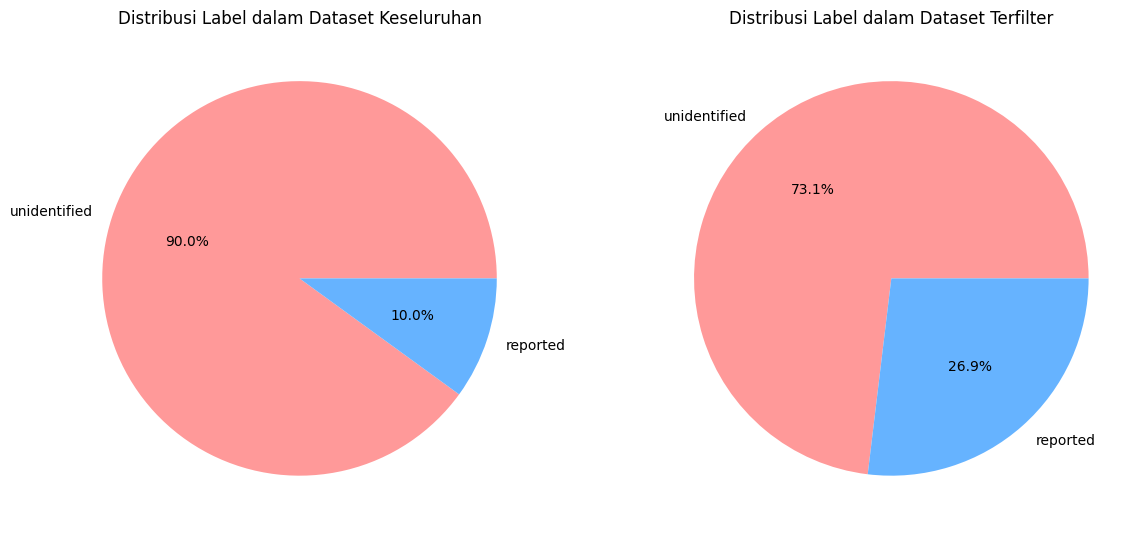

In [ ]:
import matplotlib.pyplot as plt

# Menyaring transaksi berdasarkan kriteria
filtered_df = df[
    (df['debit_party_type'] == 'customer') &
    (df['credit_party_type'] == 'customer') &
    (df['trans_amount'].between(10000, 500000))
]

# Menghitung jumlah transaksi berdasarkan label
label_counts_all = df['label'].value_counts()
label_counts_filtered = filtered_df['label'].value_counts()

# Membuat multi pie chart
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart untuk dataset keseluruhan
axes[0].pie(label_counts_all, labels=label_counts_all.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
axes[0].set_title('Distribusi Label dalam Dataset Keseluruhan')

# Pie chart untuk dataset yang sudah difilter
axes[1].pie(label_counts_filtered, labels=label_counts_filtered.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
axes[1].set_title('Distribusi Label dalam Dataset Terfilter')

plt.show()


### Modelling

In [ ]:
import pandas as pd

# Load your DataFrame (assuming df is your DataFrame)
# df = pd.read_csv('path_to_your_file.csv')  # or however you load your data

# Calculate the threshold for missing values
threshold = len(df) * 0.5

# Drop columns with more than 50% missing values
df_cleaned = df.dropna(thresh=threshold, axis=1)

print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   orderid                1000 non-null   object        
 1   trans_status           1000 non-null   object        
 2   trans_initiate_time    1000 non-null   datetime64[ns]
 3   trans_end_time         1000 non-null   object        
 4   debit_party_id         1000 non-null   object        
 5   debit_party_type       1000 non-null   object        
 6   debit_party_account    1000 non-null   object        
 7   debit_party_mnemonic   1000 non-null   object        
 8   credit_party_id        1000 non-null   object        
 9   credit_party_type      1000 non-null   object        
 10  credit_party_account   1000 non-null   object        
 11  credit_party_mnemonic  996 non-null    object        
 12  trans_amount           1000 non-null   int64         
 13  fee 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Pilih fitur dan label
features = ['trans_amount', 'transaction_duration', 'debit_party_type', 'credit_party_type']
target = 'label'

X = df[features]
y = df[target]

# Encoding fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

# Encoding label
le = LabelEncoder()
y = le.fit_transform(y)

# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Membuat dan melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[  0  30]
 [  1 269]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.90      1.00      0.95       270

    accuracy                           0.90       300
   macro avg       0.45      0.50      0.47       300
weighted avg       0.81      0.90      0.85       300



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Melakukan prediksi
rf_y_pred = rf_model.predict(X_test)

# Evaluasi model
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, rf_y_pred))


Random Forest - Confusion Matrix:
[[  3  27]
 [ 14 256]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.10      0.13        30
           1       0.90      0.95      0.93       270

    accuracy                           0.86       300
   macro avg       0.54      0.52      0.53       300
weighted avg       0.83      0.86      0.85       300



In [ ]:
from sklearn.svm import SVC

# Membuat dan melatih model SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Melakukan prediksi
svm_y_pred = svm_model.predict(X_test)

# Evaluasi model
print("SVM - Confusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))
print("\nSVM - Classification Report:")
print(classification_report(y_test, svm_y_pred))


SVM - Confusion Matrix:
[[  0  30]
 [  0 270]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.90      1.00      0.95       270

    accuracy                           0.90       300
   macro avg       0.45      0.50      0.47       300
weighted avg       0.81      0.90      0.85       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Membuat model individual
log_reg = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)  # Probability=True untuk mendapatkan probabilitas
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model individual
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Membuat model ensemble dengan soft voting
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('svm', svm),
    ('rf', rf)
], voting='soft')

# Melatih model ensemble
voting_clf.fit(X_train, y_train)

# Melakukan prediksi
y_pred = voting_clf.predict(X_test)

# Evaluasi model
print("Ensemble - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nEnsemble - Classification Report:")
print(classification_report(y_test, y_pred))


Ensemble - Confusion Matrix:
[[  0  30]
 [  0 270]]

Ensemble - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.90      1.00      0.95       270

    accuracy                           0.90       300
   macro avg       0.45      0.50      0.47       300
weighted avg       0.81      0.90      0.85       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Berikut adalah beberapa poin penting dari simpulan:

1. Identifikasi Pola Transaksi:

Ditemukan pola tertentu dalam transaksi judi online, termasuk jumlah transaksi, waktu transaksi, dan jenis transaksi.
Transaksi judi online dapat dibedakannya dari transaksi normal berdasarkan label 'reported'.

2. Statistik Deskriptif:

Statistik deskriptif menunjukkan bahwa transaksi judi online memiliki jumlah transaksi yang bervariasi, dengan rata-rata jumlah transaksi yang lebih tinggi dibandingkan transaksi normal.
Waktu transaksi judi online juga menunjukkan pola tertentu dalam waktu mulai dan akhir transaksi.

3. Pembuatan Model Machine Learning:

a. Model Logistic Regression dan Random Forest Classifier digunakan untuk memprediksi label transaksi.
b. Model Random Forest menunjukkan performa yang lebih baik dibandingkan dengan Logistic Regression dalam mengklasifikasikan transaksi judi online.

4. Evaluasi Model:

Evaluasi model menunjukkan bahwa model Random Forest dapat mengklasifikasikan transaksi judi online dengan tingkat akurasi yang lebih tinggi.
Confusion matrix dan classification report digunakan untuk mengevaluasi performa model.

5. Kesimpulan:

Penelitian ini berhasil mengidentifikasi dan membedakannya transaksi judi online dari transaksi lainnya.
Hasilnya dapat membantu penyedia layanan pembayaran dalam melaporkan dan mengambil tindakan terhadap transaksi yang mencurigakan, sehingga mematuhi regulasi dan mengurangi risiko reputasi.

6. Rekomendasi:

Rekomendasi untuk penyedia layanan pembayaran adalah menggunakan model machine learning yang telah dilatih untuk memantau dan mengidentifikasi transaksi judi online secara real-time.
Implementasi sistem pencegahan yang efektif untuk mengurangi volume transaksi judi online dan mematuhi regulasi yang berlaku.
Simpulan akhirnya adalah bahwa dengan menggunakan metode analitik dan machine learning yang tepat, transaksi judi online dapat diidentifikasi dan dikelola dengan lebih efektif, sehingga mematuhi regulasi dan mengurangi risiko yang dihadapi oleh penyedia layanan pembayaran.